In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [2]:
States = [0,1]

In [3]:
# Vamos a crear la lista de estados
def GetHiddenStates(States, NObs):
    
    CStates = list(combinations_with_replacement(States,NObs))
    
    pr = []
    
    for it in CStates:
        p = list(permutations(it,NObs))
        
        for i in p:
            if i not in pr:
                pr.append(i)      

    return np.array(pr)

In [4]:
HiddenStates = GetHiddenStates(States, 3)

In [5]:
Prior = np.array([0.4,0.6])
T = np.array([[0.7,0.3],[0.5,0.5]])
E = np.array([[0.8,0.1,0.1],[0.2,0.3,0.5]])

In [6]:
# Secuencia observada [V,A,R]
Obs = np.array([1,2,0])

In [7]:
# Probabilidades
def GetProb(T,E,Obs,HSec,Prior):
    
    p = 1.0
    # Emission matrix
    for i in range(len(Obs)):
        p *= E[HSec[i],Obs[i]]
    
    # Prior
    p *= Prior[HSec[0]]
    
    
    # Transition Matrix
    for i in range(len(HSec)-1):
        p *= T[HSec[i],HSec[i+1]]

    return p

In [8]:
# Evaluamos las probabilidad
dim = HiddenStates.shape[0]
S = np.linspace(1,dim,dim)
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)  
    
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii])

[[1 1 0]]


In [9]:
pobs = np.sum(P)
print('Probabilidad del estado observado', pobs)

Probabilidad del estado observado 0.032816


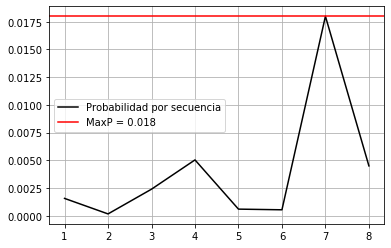

In [10]:
plt.plot(S,P,color='k',label='Probabilidad por secuencia')
plt.axhline(y = maxP, color='r',label='MaxP = %.3f' %(maxP))
plt.legend(loc=0)
plt.grid()
plt.savefig('MarkovMoods.pdf')

In [11]:
# Verifiquemos la probabilidad para cada estados

In [12]:
BasicStates = [0,1,2]
ObsStates = GetHiddenStates(BasicStates, 3)

In [13]:
Nobs = ObsStates.shape[0]

ProbObsStates = np.zeros(Nobs)

for j in range(Nobs):
    
     # Vamos a iterar sobre cada estado visible para comprobar la clausura 
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)

    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)  
    
    ProbObsStates[j] = np.sum(P)
    
print(ProbObsStates)
print(np.sum(ProbObsStates))
maxObsState = np.max(ProbObsStates)

[0.156464 0.042592 0.041008 0.068728 0.059344 0.056608 0.104488 0.013904
 0.019184 0.022616 0.020288 0.020144 0.026888 0.032816 0.029264 0.035336
 0.029648 0.041048 0.051536 0.008008 0.011776 0.012088 0.012568 0.017896
 0.018496 0.019048 0.028216]
1.0


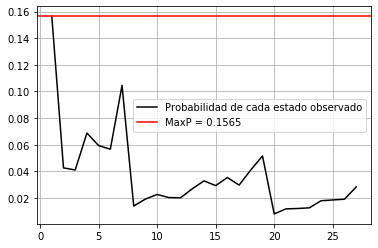

In [15]:
dim = ProbObsStates.shape[0]
S = np.linspace(1,dim,dim)
plt.plot(S,ProbObsStates,color='k',label='Probabilidad de cada estado observado')
plt.axhline(y = maxObsState, color='r',label='MaxP = %.4f' %(maxObsState))
plt.legend(loc=0)
plt.grid()
plt.savefig('MarkovMoodsObs.pdf')